<a href="https://colab.research.google.com/github/sugban/Spark-Internship/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sb

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [6]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**We can see there is no null value in the dataframe**

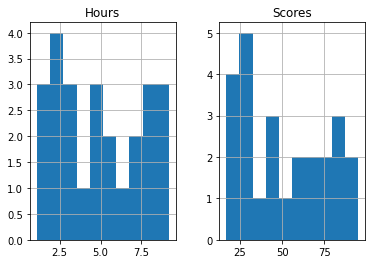

In [9]:
viz = df[['Hours','Scores']]
viz.hist()
plt.show()

**Now, lets plot the scores vs hours, to see how linear is their relation**

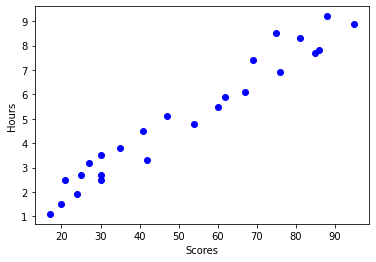

In [11]:
plt.scatter(df.Scores,df.Hours,color='blue')
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.show()

**Creating train and test dataset**
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with, and since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets...

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434662


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from the data.

Text(0, 0.5, 'Hours')

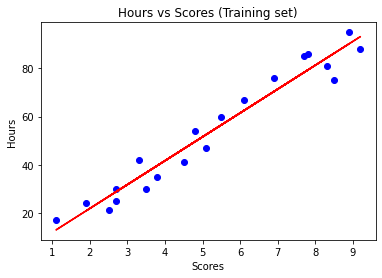

In [29]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train, regr.coef_[0]*x_train + regr.intercept_, '-r')
plt.title('Hours vs Scores (Training set)')
plt.xlabel("Scores")
plt.ylabel("Hours")

Text(0, 0.5, 'Hours')

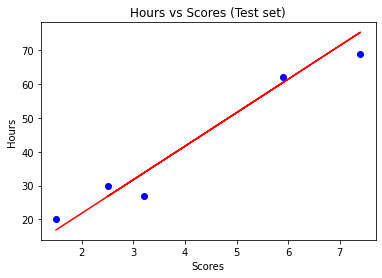

In [30]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test, regr.coef_[0]*x_test + regr.intercept_, '-r')
plt.title('Hours vs Scores (Test set)')
plt.xlabel("Scores")
plt.ylabel("Hours")

In [39]:
pred_val=regr.predict(x_test)
pd.DataFrame({'Actual_value':y_test,'Predicted_value':pred_val})

,Actual_value,Predicted_value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


**To check the acuracy of the model**
---
*R-squared* is a popular metric for accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative. 
So let's find out here....

In [43]:
r2_score(y_test,pred_val)

0.9454906892105354

To find the **the predicted score** of a student, who studies for 9.25hr/day

In [48]:
pred_hour = regr.predict([[9.25]])
print('a student, who studies for 9.25hr/day, the predicted score will be : ', pred_hour)

a student, who studies for 9.25hr/day, the predicted score will be :  [93.69173249]
